# Исследование надежности заемщиков

Заказчик исследования - кредитный отдел банка. В рамках исследования необходимо выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка - статистика о платежеспособности клиентов. (Результаты исследования будут учтены при построении модели кредитного скоринга - специальной системы, которая оценивает способность потенциального заемщика вернуть кредит банку).

**Цель исследования:** определить риск-факторы для невозврата кредита заемщиками в установленный срок

**Задачи исследования:** 

- определить пригодность исходных данных для дальнейшего анализа, провести предобработку данных;
- провести категоризацию данных;
- определить наличие зависимости между невозвратом кредита в срок и прочими характеритиками клиентов; 
- сформулировать риск-факторы для невозврата кредита заемщиками в установленный срок.

**Описание данных:**
- children - количество детей в семье;
- days_employed - общий трудовой стаж в днях;
- dob_years - возраст клиента в годах;
- education - уровень образования клиента;
- education_id - идентификатор уровня образования;
- family_status - семейное положение;
- family_status_id - идентификатор семейного положения;
- gender - пол клиента;
- income_type - тип занятости;
- debt - имел ли задолженность по возврату кредитов;
- total_income - ежемесячный доход;
- purpose - цель получения кредита. 

## Краткие выводы по результатам анализа

По результатам категориального исследования данных можно сделать о том, что дополнительными рисковыми факторами для невозврата кредита в установленный срок являются: 

- наличие у заемщика детей;
- отнесение заемщика к категориям "не женат/не замужем", "состоит в гражданском браке";
- указание в качестве цели кредита "операции с автомобилем" либо "получение образования";
- уровень годового дохода в размере 50001–200000.

## Обзор данных

Импортируем необходимые для проведения анализа данных библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

Прочитаем файл `data.csv` с данными (путь к данным храниться в файле формата json) и сохраним его в переменной `data`:

In [2]:
# Чтение JSON файла
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)
 
# Чтение CSV файла с использованием пути из JSON
dataset_path = config['dataset_path_bank']
data = pd.read_csv(dataset_path)

Уберем ограничения при отображении количества столбцов, строк, ширины столбцов.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Выведем первые 10 строчек датафрейма `data` на экран.

In [4]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В исходном датафрейме 21 525 строк с информацией о клиентах банка. При этом не для всех клиентов указаны данные об общем трудовом стаже в днях (days_employed) и ежемесячном доходе (total_income).

## Предобработка данных

### Обработка аномальных значений

Стоит отметить, что в датасете указано отрицательное количество дней трудового стажа в столбце `days_employed`, что является аномальным значением. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`:

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях:

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) аномально большие значения. Исправить такие значения невозможно на основании имеющихся данных, поэтому оставим их как есть, однако стоит обратить внимание заказчика на наличие подобной аномалии в исходных данных.

Выведем перечень уникальных значений столбца `children`:

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`:

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца children, чтобы убедиться, что артефакты удалены:

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков 

Выведем количество пропущенных значений для каждого столбца:

In [11]:
data.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2162
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — days_employed. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце можно медианным значением по каждому типу из столбца income_type:

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Пропуски в столбце days_employed также заполним медианными значениями по каждому типу занятости income_type:

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены:

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`:

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв.

In [16]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных:

In [17]:
data.duplicated().sum()

71

Удалим явные дубликаты:

In [18]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме data столбец total_income_category с категориями:

- 0-30 000 - E;
- 30 001-50 000 - D;
- 50 001-200 000 - C;
- 200 001-1 000 000 - B;
- 1 000 001 и выше - A.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`:

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

- операции с автомобилем;
- операции с недвижимостью;
- проведение свадьбы;
- получение образования.

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Анализ данных

### Зависимость между количеством детей и возвратом кредита в срок

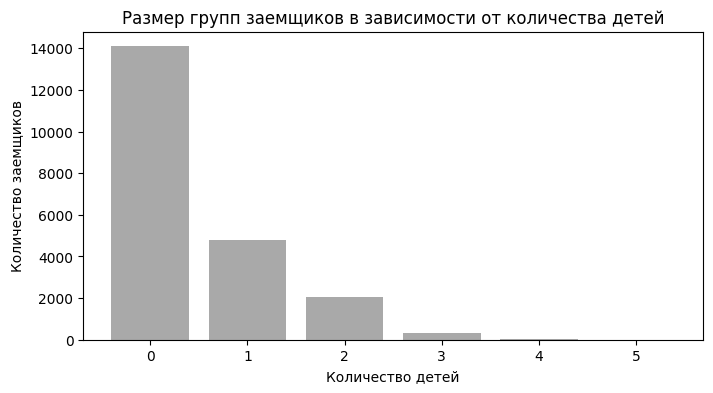

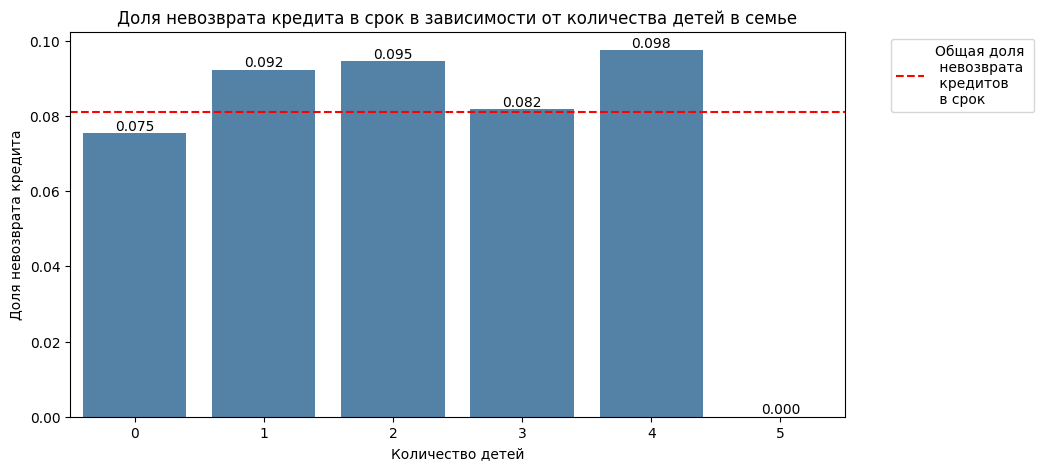

In [24]:
# Выведем на экран размер групп заемщиков в зависимости от количества детей
# Группируем данные по количеству детей и подсчитываем количество заемщиков
children_count = data.groupby('children')['children'].count()

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
plt.bar(children_count.index, children_count.values, color='darkgrey')
plt.xlabel('Количество детей')
plt.ylabel('Количество заемщиков')
plt.title('Размер групп заемщиков в зависимости от количества детей')
plt.xticks(rotation=0)

# Отображаем диаграмму
plt.show()
print()

# Определим общую долю людей, возвращающих кредит не в срок
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count()/data['debt'].count()

# Сгруппируем данные по количеству детей в семьях 
# и определим долю невозврата кредита в срок в зависимости от количества детей в семье
dept_child_dependance = data.groupby('children')['debt'].mean()

# Визуализируем полученные результаты
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sorted(data['children'].unique()), y=dept_child_dependance, color='steelblue')
ax.set_title('Доля невозврата кредита в срок в зависимости от количества детей в семье')
ax.set_xlabel('Количество детей')
ax.set_ylabel('Доля невозврата кредита')

# Добавим пунктирную линию, показывающую общую долю невозврата кредитов
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Общая доля \n невозврата \n кредитов \n в срок')

# Добавляем легенду
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображаем данные о доле невозврата кредита на графике
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')

# Показываем график
plt.show()

**Вывод:** Поскольку абсолютное количество семей с 4-мя и 5-ю дети значительно ниже, чем размеры групп в остальной выборке, эти данные не будут учтены при дальнейшей оценке зависимости. Если же посмотреть на результаты по остальным группам, можно сделать вывод о наличии хоть и нелинейной, но зависимости между количеством детей в семье и возвратом кредитов в срок. Так для всех семей без детей показатель невыплаты по кредиту в срок ниже, чем аналогичное значение для всего массива данных в целом, в то время как для всех семей с одним, двумя и тремя детьми этот показатель превышает общий показатель. 

### Зависимость между семейным положением и возвратом кредита в срок

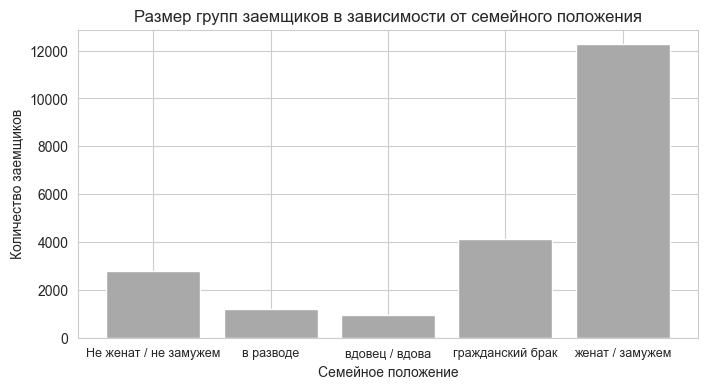

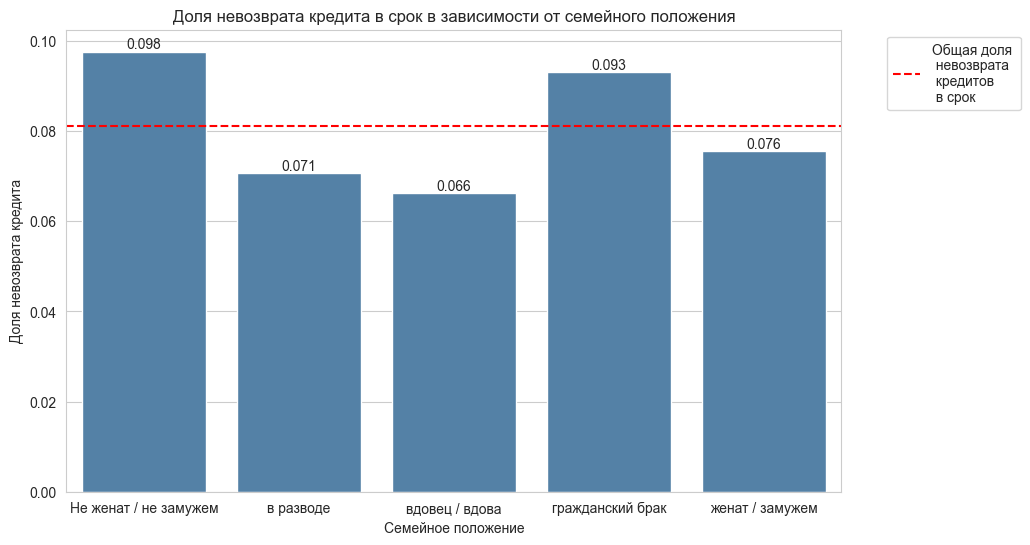

In [39]:
# Выведем на экран размер групп заемщиков в зависимости от семейного положения 
# Группируем данные по семейному положению и подсчитываем количество заемщиков
family_status_count = data.groupby('family_status')['family_status'].count()

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
plt.bar(family_status_count.index, family_status_count.values, color='darkgrey')
plt.xlabel('Семейное положение')
plt.ylabel('Количество заемщиков')
plt.title('Размер групп заемщиков в зависимости от семейного положения')
plt.xticks(rotation=0, fontsize=9) 

# Отображаем диаграмму
plt.show()
print()

# Определим общую долю людей, возвращающих кредит не в срок
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count()/data['debt'].count()

# Сгруппируем данные по значению столбца family_status и определим долю невозврата кредита в срок 
# в зависимости от семейного положения
dept_marriage_dependance = data.groupby('family_status')['debt'].mean()

# Визуализируем полученные результаты
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted(data['family_status'].unique()), y=dept_marriage_dependance, color='steelblue')
ax.set_title('Доля невозврата кредита в срок в зависимости от семейного положения')
ax.set_xlabel('Семейное положение')
ax.set_ylabel('Доля невозврата кредита')
plt.xticks(rotation=0, fontsize=10)

# Добавим пунктирную линию, показывающую общую долю невозврата кредитов
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Общая доля \n невозврата \n кредитов \n в срок')

# Добавляем легенду
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображаем данные о доле невозврата кредита на графике
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')
 
# Показываем график
plt.show()

**Вывод:** Поскольку группы заемщиков, имеющих семейное положение "вдовец/вдова" и "в разводе" относительно малочисленны, предлагаем не включать их результаты в выводы по результатам анализа. В целом, зависимость между семейным положением и возвратом кредитов в срок имеется. По результатам расчетов чаще, чем в целом по массиву данных, задолженность при выплате кредита возникает у не женатых/не замужних и состоящих в гражданском браке, в то время как люди женатые/замужние люди чаще остальных закрывают взятые кредиты в срок. 

### Зависимость между уровнем дохода и возвратом кредита в срок

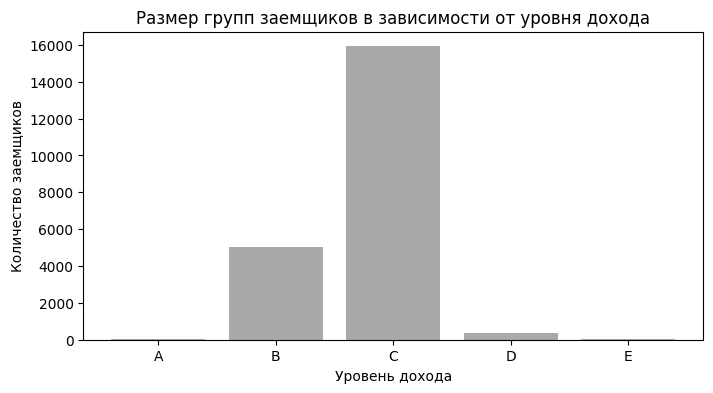

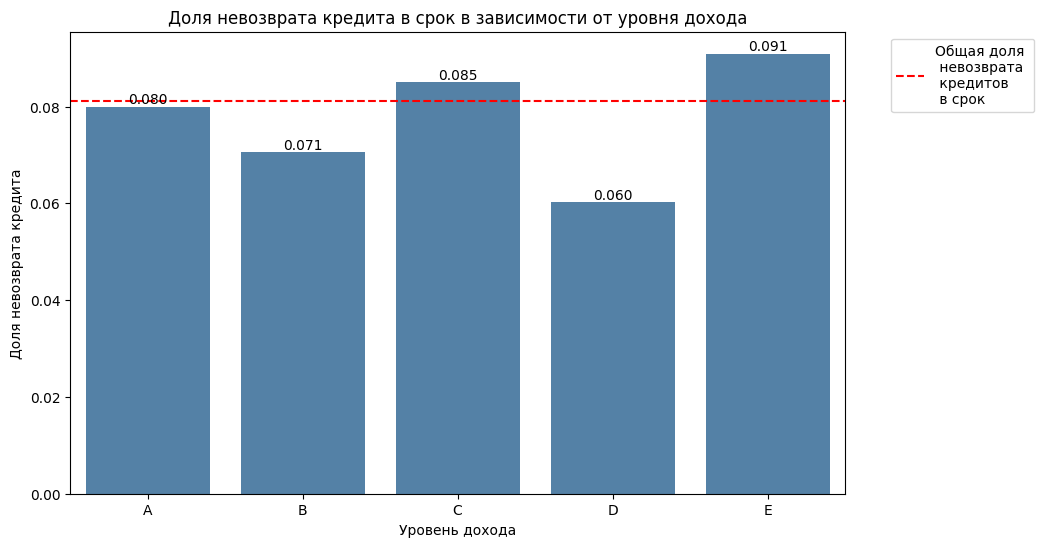

In [26]:
# Выведем на экран размер групп заемщиков в зависимости от уровня дохода
# Группируем данные по уровню дохода и подсчитываем количество заемщиков
income_count = data.groupby('total_income_category')['total_income_category'].count()

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
plt.bar(income_count.index, income_count.values, color='darkgrey')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество заемщиков')
plt.title('Размер групп заемщиков в зависимости от уровня дохода')
plt.xticks(rotation=0)

# Отображаем диаграмму
plt.show()
print()

# Определим общую долю людей, возвращающих кредит не в срок
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count()/data['debt'].count()

# Сгруппируем данные по значению столбца total_income_category и определим долю 
# невозврата кредита в срок в зависимости от уровня дохода
dept_income_dependance = data.groupby('total_income_category')['debt'].mean()

# Визуализируем полученные результаты
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted(data['total_income_category'].unique()), y=dept_income_dependance, color='steelblue')
ax.set_title('Доля невозврата кредита в срок в зависимости от уровня дохода')
ax.set_xlabel('Уровень дохода')
ax.set_ylabel('Доля невозврата кредита')

# Добавим пунктирную линию, показывающую общую долю невозврата кредитов
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Общая доля \n невозврата \n кредитов \n в срок')

# Добавляем легенду
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображаем данные о доле невозврата кредита на графике
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')
 
# Показываем график
plt.show()

0–30 000 — 'E';
30 001–50 000 — 'D';
50 001–200 000 — 'C';
200 001–1 000 000 — 'B';
1 000 001 и выше — 'A'.

In [27]:
# Определим состав группы D по типу занятости
D_category = data.loc[data['total_income_category'] == 'D']
D_category_grouped = D_category.groupby('income_type')['income_type'].count()
D_category_grouped

income_type
госслужащий     24
компаньон       25
пенсионер      164
сотрудник      136
Name: income_type, dtype: int64

**Вывод:** 
Принимая во внимание относительную малочисленность групп A и E и не учитывая результаты данных групп при анализе результатов, можно сделать вывод о том, что зависимость между уровнем дохода и возвратом кредита в срок имеется. Так наибольшей дисциплинированностью при возврате заемных средств отличаются небольшая группа D, практически наполовину состоящая из заемщиков категории "пенсионер", а также группа B, входящие в состав которой заемщики имеют достаточно высокий доход. В то время как показатель самой многочисленной группы C превышает общую долю невозврата кредита в срок для всего массива данных. 

### Влияние целей кредита на его возврат в срок

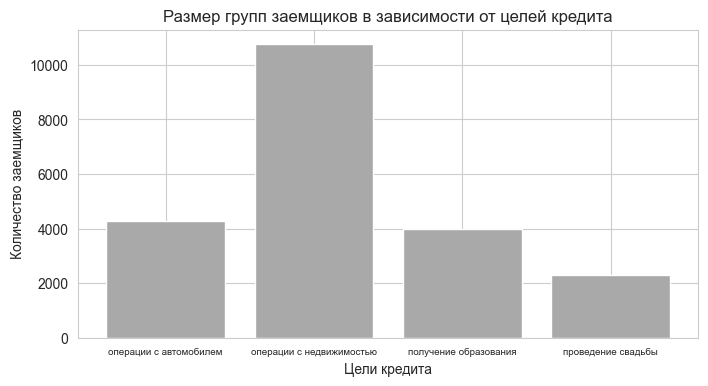

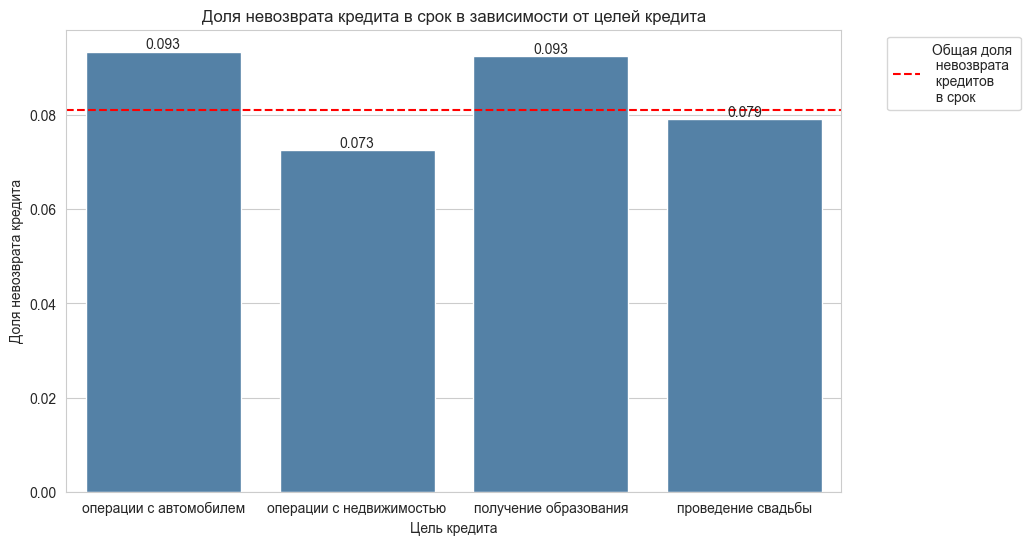

In [40]:
# Выведем на экран размер групп заемщиков в зависимости от целей кредита
# Группируем данные по целям кредита и подсчитываем количество заемщиков
purpose_count = data.groupby('purpose_category')['purpose_category'].count()

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 4))
plt.bar(purpose_count.index, purpose_count.values, color='darkgrey')
plt.xlabel('Цели кредита')
plt.ylabel('Количество заемщиков')
plt.title('Размер групп заемщиков в зависимости от целей кредита')
plt.xticks(rotation=0, fontsize=7)  

# Отображаем диаграмму
plt.show()
print()

# Определим общую долю людей, возвращающих кредит не в срок
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count()/data['debt'].count()

# Сгруппируем данные по значению столбца purpose_category и определим долю невозврата кредита в срок в зависимости от цели кредита
dept_purpose_dependance = data.groupby('purpose_category')['debt'].mean()

# Визуализируем полученные результаты
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted(data['purpose_category'].unique()), y=dept_purpose_dependance, color='steelblue')
ax.set_title('Доля невозврата кредита в срок в зависимости от целей кредита')
ax.set_xlabel('Цель кредита')
ax.set_ylabel('Доля невозврата кредита')
plt.xticks(rotation=0, fontsize=10)

# Добавим пунктирную линию, показывающую общую долю невозврата кредитов
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Общая доля \n невозврата \n кредитов \n в срок')

# Добавляем легенду
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображаем данные о доле невозврата кредита на графике
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')
 
# Показываем график
plt.show()

**Вывод:** Цели кредита оказывают влияние на возврат кредита в срок. По результатам исследования заемщики, которые привлекают средства на "операции с недвижимостью" (самая многочисленная категория) и с целью "проведения свадьбы" (наиболее малочисленная), чаще возвращают заемные средства в срок, нежели те, чья цель "операции с автомобилем" либо "получение образования".

### Связь между количеством кредитов и количеством детей

Для отображения изменений по категориям используем линейный график. Заранее сгруппируем данные и сформируем необходимую таблицу.

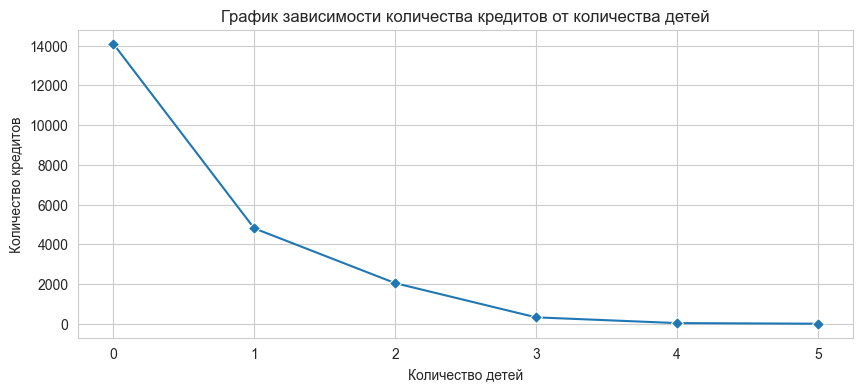

In [29]:
# Готовим данные для подсчёта кредитов в зависимости от количества детей
data_ch = data.groupby('children')[['children']].count()

# Применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')

# Назначаем размер графика
plt.figure(figsize=(10, 4))

# Строим линейный график средствами seaborn
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='D')

# Формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')

# Отображаем график на экране
plt.show()

**Вывод:** Число выданных кредитов падает в зависимости от числа детей в семье заёмщика. Возможно, это связано не с тем, что многодетные семьи реже берут кредиты, а с тем, что количество семей без детей или с 1–2 детьми намного больше, чем количество многодетных семей.

### Связь между доходом и образованием

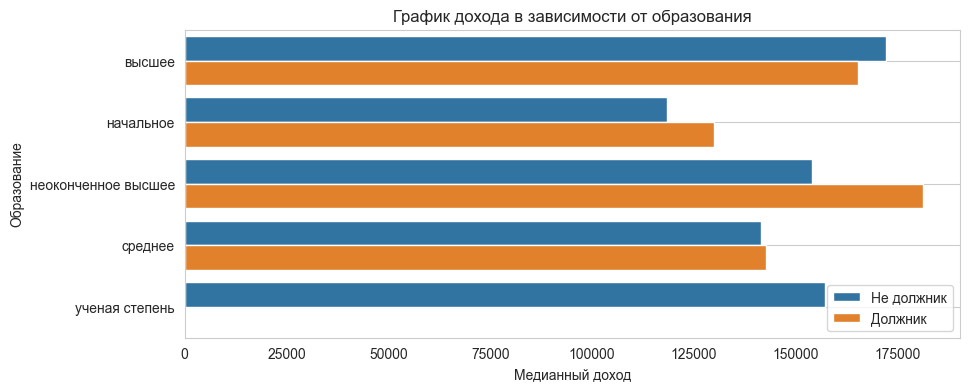

In [30]:
# Группируем данные по образованию и задолженности и считаем медианный доход
data_ed = data.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()

# Назначаем размер графика
plt.figure(figsize=(10, 4))

# Задаем цвета для столбцов
colors = ['#1f77b4', '#ff7f0e']

# Строим столбчатый график средствами seaborn
sns.barplot(x='total_income', y='education', data=data_ed, hue='debt', palette=colors)


# Формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')

# Создаем легенду и сохраняем её в переменную
legend = plt.legend(loc='lower right', fontsize=10)
legend.texts[0].set_text('Не должник')
legend.texts[1].set_text('Должник')

# Добавляем сетку
plt.grid()

# Отображаем график на экране
plt.show()

**Вывод:** Должниками бывают люди и с высшим, и с начальным образованием. Однако среди людей с учёной степенью должников нет вообще.

## Общий вывод

В ходе исследования были удалены пропуски и ошибки в критически значимых данных, в исходную таблицу были добавлены дополнительные столбцы, позволяющие легко группровать данные по значимым категориям уровня дохода заемщика и его целей привлечения заемных средств. 

По результатам категориального исследования данных можно сделать о том, что банку при выдаче кредитов новым заемщикам необходимо учитывать в качестве дополнительных рисковых факторов: 
- наличие у заемщика детей;
- отнесение заемщика к категориям "не женат/не замужем", "состоит в гражданском браке";
- указание в качестве цели кредита "операции с автомобилем" либо "получение образования";
- уровень годового дохода в размере 50001–200000.

Также стоит отметить, что число выданных кредитов падает в зависимости от числа детей в семье заёмщика. Касательно уровня образования, только заемщики с ученой степенью не попадают в категорию должников.